In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib.legend_handler import HandlerLine2D

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

%matplotlib inline

## Results - Test Accuracy
- kNN: Best Score: 0.5947303410091553
- Decision Tree: Test Accuracy: 0.5695461200585652
- Random Forest: Best Score: 0.6210346510492923
- Gradient Boosting: Test Accuracy: 0.6039092753088696


In [225]:
df = pd.read_csv('../../Data/Players With Award Data/complete_players_with_award_voting.csv',index_col=0)
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ROTY_Pts Won,ROTY_Pts Max,ROTY_Share,ROTY,SMOTY_Rank,SMOTY_First,SMOTY_Pts Won,SMOTY_Pts Max,SMOTY_Share,SMOTY
0,Marty Byrnes,SF,23.0,LAL,32.0,0.0,6.1,0.8,1.6,0.5000,...,0.0,-1.0,0.0,False,0.0,0.0,0.0,-1.0,0.0,False
1,Steve Hawes,PF,29.0,ATL,82.0,0.0,22.6,3.7,7.4,0.5000,...,0.0,-1.0,0.0,False,0.0,0.0,0.0,-1.0,0.0,False
3,Spencer Haywood,PF,30.0,LAL,76.0,0.0,20.3,3.8,7.8,0.4872,...,0.0,-1.0,0.0,False,0.0,0.0,0.0,-1.0,0.0,False
4,Gar Heard,PF,31.0,PHO,82.0,0.0,17.1,2.1,5.0,0.4200,...,0.0,-1.0,0.0,False,0.0,0.0,0.0,-1.0,0.0,False
5,Gerald Henderson,PG,24.0,BOS,76.0,2.0,14.0,2.5,5.0,0.5000,...,0.0,-1.0,0.0,False,0.0,0.0,0.0,-1.0,0.0,False


In [226]:
feature_list = ['AST','TRB','FG%','FT%','TOV','STL','BLK','PTS','Pos']

In [227]:
pos_to_num_map = {'PG':1,'SG':2,'SF':3,'PF':4,'C':5}
df = df[(df['MP'] > 0) & (df['G'] > 0) & (df['PTS'] > 0)]
df_subset = df[feature_list].copy()
df_subset.Pos = df_subset.Pos.map(pos_to_num_map)
df_subset.loc[:,'Pos'] = pd.Categorical(df_subset.loc[:,'Pos'])

df.shape

(13660, 85)

<AxesSubplot:>

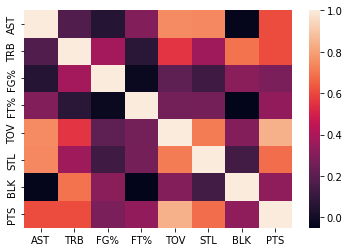

In [228]:

sns.heatmap(df_subset.corr())

<AxesSubplot:xlabel='TOV', ylabel='Pos'>

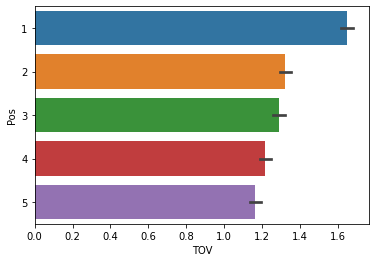

In [229]:
# sns.scatterplot(x='AST',y='Pos',data=df_subset)
sns.barplot(x='TOV',y='Pos',data=df_subset)

In [230]:
X = df_subset.drop('Pos',axis=1)
y = df_subset.Pos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [231]:
clf = tree.DecisionTreeClassifier()

In [232]:
clf = clf.fit(X_train,y_train)

In [233]:
pred = clf.predict(X_test)

In [234]:
# tree.plot_tree(clf,
#               feature_names= X.columns,
#               filled=True)
# plt.show()

In [235]:

ex_tree_accuracy_score = metrics.accuracy_score(y_test, pred)
print("Accuracy on test data: ", ex_tree_accuracy_score)

# Compute accuracy using training data.
ex_acc_train_tree = clf.score(X_train,
                                 y_train)
print ("Train Accuracy:", ex_acc_train_tree)

Accuracy on test data:  0.5141532454856027
Train Accuracy: 0.999477096841665


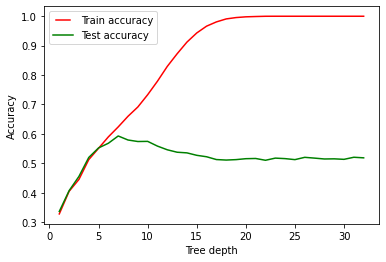

In [236]:
# Define function that will determine the optimal number for each parameter.
def optimal_parameter(values,test_results):
    best_test_value = max(test_results)
    best_test_index = test_results.index(best_test_value)
    best_value = values[best_test_index]
    return(best_value)

# Fit a Decision Tree with depths ranging from 1 to 32 and plot the training and test accuracy
ex_max_depths = np.linspace(1, 32, 32, endpoint = True)
ex_train_results = []
ex_test_results = []

for max_depth in ex_max_depths:
   ex_dt = tree.DecisionTreeClassifier(max_depth = max_depth)
   ex_dt.fit(X_train, y_train)

   ex_train_pred = ex_dt.predict(X_train)
   ex_acc_train = metrics.accuracy_score(y_train, ex_train_pred)

   # Add accuracy score to previous train results
   ex_train_results.append(ex_acc_train)

   ex_y_pred = ex_dt.predict(X_test)
   ex_acc_test = metrics.accuracy_score(y_test, ex_y_pred)

   # Add accuracy score to previous test results
   ex_test_results.append(ex_acc_test)

# Store optimal max_depth.
ex_optimal_max_depth = optimal_parameter(ex_max_depths,ex_test_results)

# Plot max depth over 1 - 32.
line1, = plt.plot(ex_max_depths, ex_train_results, 'r', label= "Train accuracy")
line2, = plt.plot(ex_max_depths, ex_test_results, 'g', label= "Test accuracy")
#
plt.legend(handler_map={line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()


In [237]:
ex_min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
ex_train_results = []
ex_test_results = []

for min_samples_split in ex_min_samples_splits:
   ex_dt = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
   ex_dt.fit(X_train, y_train)

   ex_train_pred = ex_dt.predict(X_train)
   ex_acc_train = metrics.accuracy_score(y_train, ex_train_pred)

   # Add accuracy score to previous train results
   ex_train_results.append(ex_acc_train)

   ex_y_pred = ex_dt.predict(X_test)
   ex_acc_test = metrics.accuracy_score(y_test, ex_y_pred)

   # Add accuracy score to previous test results
   ex_test_results.append(ex_acc_test)

# Store optimal max_depth.
ex_optimal_min_samples_split = optimal_parameter(ex_min_samples_splits,ex_test_results)


In [238]:
# Min_samples_leaf:
ex_min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint = True)
ex_train_results = []
ex_test_results = []

for min_samples_leaf in ex_min_samples_leafs:
   ex_dt = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   ex_dt.fit(X_train, y_train)

   ex_train_pred = ex_dt.predict(X_train)
   ex_acc_train = metrics.accuracy_score(y_train, ex_train_pred)

   # Add accuracy score to previous train results
   ex_train_results.append(ex_acc_train)

   ex_y_pred = ex_dt.predict(X_test)
   ex_acc_test = metrics.accuracy_score(y_test, ex_y_pred)

   # Add accuracy score to previous test results
   ex_test_results.append(ex_acc_test)

ex_optimal_min_samples_leafs = optimal_parameter(ex_min_samples_leafs,ex_test_results)


# Optimize: max features
ex_max_features = list(range(1,X.shape[1]))
ex_train_results = []
ex_test_results = []

for max_feature in ex_max_features:
   ex_dt = tree.DecisionTreeClassifier(max_features=max_feature)
   ex_dt.fit(X_train, y_train)

   ex_train_pred = ex_dt.predict(X_train)
   ex_acc_train = metrics.accuracy_score(y_train, ex_train_pred)

   # Add accuracy score to previous train results
   ex_train_results.append(ex_acc_train)

   ex_y_pred = ex_dt.predict(X_test)
   ex_acc_test = metrics.accuracy_score(y_test, ex_y_pred)

   # Add accuracy score to previous test results
   ex_test_results.append(ex_acc_test)

ex_optimal_max_features = optimal_parameter(ex_max_features,ex_test_results)



In [239]:
print("The optimal max depth is:", ex_optimal_max_depth)
print("The optimal min samples split is:", ex_optimal_min_samples_split)
print("The optimal min samples leaf is:", ex_optimal_min_samples_split)
print("The optimal max features is:", ex_optimal_max_features)


The optimal max depth is: 7.0
The optimal min samples split is: 0.1
The optimal min samples leaf is: 0.1
The optimal max features is: 6


In [240]:

# Build optimized model
np.random.seed(1)

# Implement the Decision Tree on ex_X_train.
ex_clf_optimized = tree.DecisionTreeClassifier(max_depth = ex_optimal_max_depth,

                                            max_features = ex_optimal_max_features)

# We can now see our optimized features where before they were just default:
print(ex_clf_optimized)
ex_clf_optimized_fit = ex_clf_optimized.fit(X_train, y_train)
# Predict on ex_X_test.
ex_y_predict_optimized = ex_clf_optimized_fit.predict(X_test)
# Get the accuracy score.
ex_acc_score_tree_optimized = metrics.accuracy_score(y_test, ex_y_predict_optimized)
print('Test Accuracy:', ex_acc_score_tree_optimized)


# Compute accuracy using training data.
ex_acc_train_tree_optimized = ex_clf_optimized_fit.score(X_train, y_train)
print ("Train Accuracy:", ex_acc_train_tree_optimized)




DecisionTreeClassifier(max_depth=7.0, max_features=6)
Test Accuracy: 0.56564177647633
Train Accuracy: 0.6075088893536917


In [241]:
# tree.plot_tree(ex_clf_optimized_fit,
#               feature_names= X.columns,
#               filled=True)
# plt.show()

In [243]:
# X_train


pd.DataFrame(ex_clf_optimized_fit.predict(df.loc[feature_list,df.Player == 'Giannis Antetokounmpo',]),columns=['Pos'])

# pd.DataFrame(ex_clf_optimized.predict(df.loc[df.Player == 'Giannis Antetokounmpo',feature_list]),columns=['Position']).value_counts()

ValueError: list.remove(x): x not in list

In [251]:
pd.DataFrame(ex_clf_optimized_fit.predict(df.loc[df.Player == 'Giannis Antetokounmpo',feature_list,]),columns=['Pos']).Pos.map({v:k  for k, val in pos_to_num_map.items() for v in val })

TypeError: 'int' object is not iterable

# Kneighbors

In [123]:
from sklearn.neighbors import KNeighborsClassifier


,AST,TRB,FG%,FT%,TOV,STL,BLK,PTS
0,0.4,0.8,0.5000,0.8000,0.7,0.2,0.0,2.0
1,1.8,6.0,0.5000,0.8182,1.5,0.9,0.4,9.3
3,1.2,4.6,0.4872,0.7778,1.8,0.5,0.8,9.7
4,1.2,4.6,0.4200,0.8000,1.1,1.0,0.6,5.0
5,1.9,1.1,0.5000,0.7059,1.4,0.6,0.2,6.2
...,...,...,...,...,...,...,...,...
16056,1.4,3.4,0.4146,0.8182,0.8,0.5,0.2,5.0
16057,0.4,2.6,0.3958,0.8571,0.4,0.3,0.2,4.8
16058,1.5,4.7,0.4833,0.6552,1.1,0.8,0.4,7.9
16059,0.3,2.2,0.3462,0.5000,0.3,0.3,0.1,2.7


In [113]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train, y_train)
predictions = kNN.predict(X_test)

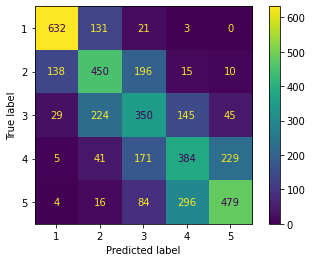

In [114]:
cm = metrics.confusion_matrix(y_test, predictions)
# print(cm)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_,)

disp.plot()

plt.show()

In [138]:

# df_scaled = pd.DataFrame(std_scaler.fit_transform(df_subset),columns=df_subset.columns)
# X_scaled = df_scaled.drop('Pos',axis=1)
# y = df_subset.Pos
# X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# X_train_scaled.head()


In [139]:

param_grid = dict(n_neighbors = [i for i in range(1,31)])
ex_grid = RandomizedSearchCV(kNN, param_grid, cv = 15, scoring = 'accuracy')



In [140]:
ex_grid_search_pipeline = Pipeline([('transformer',  StandardScaler()), ('estimator', ex_grid)])
ex_grid_search_pipeline.fit(X, y)
print(ex_grid.cv_results_['mean_test_score'])

[0.52408005 0.52313193 0.54267741 0.5538041  0.56793436 0.56317752
 0.57166805 0.57452166 0.57642819 0.57869579 0.58126006 0.5849184
 0.58616358 0.58916571 0.58982417 0.58967684 0.59231396 0.59106846
 0.5912876  0.59289771 0.5928255  0.59377724 0.59289852 0.59253302
 0.5935577  0.5937047  0.59473034 0.59319236 0.59421631 0.59150843]


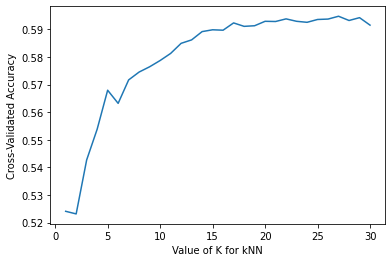

In [145]:
ex_grid_mean_scores = list(ex_grid.cv_results_['mean_test_score'])

plt.plot(list(range(1, 31)), ex_grid_mean_scores)
plt.xlabel('Value of K for kNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [149]:
print('Best Score:',ex_grid.best_score_)

print(ex_grid.best_params_)


Best Score: 0.5947303410091553
{'n_neighbors': 27}


# Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
rf_model = RandomForestClassifier()
# param_grid = dict(max_depth=list(range(7,15,3)),criterion=['gini','entropy'])
param_grid = dict(n_estimators=list(range(100,501,5)),max_depth=[10])
rand_search_rf = RandomizedSearchCV(rf_model, param_grid, n_iter=5, scoring = 'accuracy')

rand_search_rf.fit(X,y)


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [10],
                                        'n_estimators': [100, 105, 110, 115,
                                                         120, 125, 130, 135,
                                                         140, 145, 150, 155,
                                                         160, 165, 170, 175,
                                                         180, 185, 190, 195,
                                                         200, 205, 210, 215,
                                                         220, 225, 230, 235,
                                                         240, 245, ...]},
                   scoring='accuracy')

In [177]:
print(f'{rand_search_rf.best_params_} - {rand_search_rf.best_score_}')

{'n_estimators': 465, 'max_depth': 10} - 0.6158857979502196


In [ ]:
# Grid Search Results
# {'criterion': 'gini', 'max_depth': 8} - 0.6181559530846029
# {'max_depth': 10} - 0.6177159590043925


# Randomized Search Results
# {'n_estimators': 465, 'max_depth': 10} - 0.6158857979502196

# I'm comfortable concluding that this is near the limit on accuracy. Using the best result so far.

In [180]:
opt_rf = RandomForestClassifier(max_depth=8,)
opt_rf = opt_rf.fit(X_train,y_train)

In [181]:
pred_rf = opt_rf.predict(X_test)

In [184]:
metrics.accuracy_score(y_test,pred_rf)

0.6210346510492923

# Logistic Regression

In [188]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

# clf.score()

/Users/chaseallbright/Dropbox/NBA/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [270]:
df[(df.Pos == 'SG') & (df.AST > 0)].columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'STAR', 'Year',
       'Tm_AGE', 'Tm_W', 'Tm_L', 'Tm_PW', 'Tm_PL', 'Tm_MOV', 'Tm_SOS',
       'Tm_SRS', 'Tm_ORtg', 'Tm_DRtg', 'Tm_NRtg', 'Tm_PACE', 'Tm_FTr',
       'Tm_3PAr', 'Tm_TS%', 'Tm_eFG%', 'Tm_TOV%', 'Tm_ORB%', 'Tm_FT/FGA',
       'Tm_Op_eFG%', 'Tm_Op_TOV%', 'Tm_DRB%', 'Tm_Op_FT/FGA', 'Win%',
       'DPOY_Rank', 'DPOY_First', 'DPOY_Pts Won', 'DPOY_Pts Max', 'DPOY_Share',
       'DPOY', 'MIP_Rank', 'MIP_First', 'MIP_Pts Won', 'MIP_Pts Max',
       'MIP_Share', 'MIP', 'MVP_Rank', 'MVP_First', 'MVP_Pts Won',
       'MVP_Pts Max', 'MVP_Share', 'MVP', 'ROTY_Rank', 'ROTY_First',
       'ROTY_Pts Won', 'ROTY_Pts Max', 'ROTY_Share', 'ROTY', 'SMOTY_Rank',
       'SMOTY_First', 'SMOTY_Pts Won', 'SMOTY_Pts Max', 'SMOTY_Share',
       'SMOTY'],
      dtype='object')